<a href="https://colab.research.google.com/github/sunnyshahabuddin/Convolutional-Neural-Network/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout #to implement dropout
from keras.layers import Flatten #this flatten our data into our neural network
from keras.layers.convolutional import Conv2D #this create the convolutional layer
from keras.layers.convolutional import MaxPooling2D #this create pooling layer

from keras.models import Model #this helps in defining the model and help train the model using the previously trained models available

In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [7]:
num_of_samples=[]

In [8]:
cols = 5
num_classes = 10

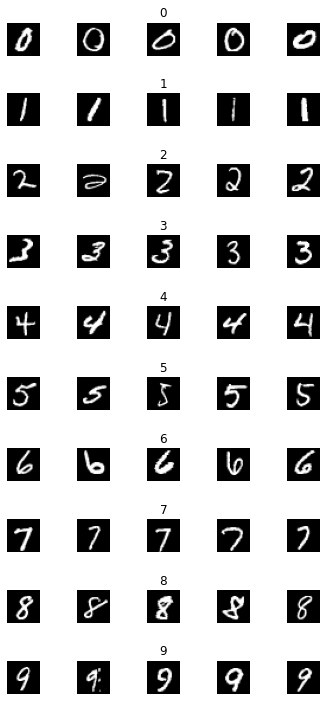

In [9]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


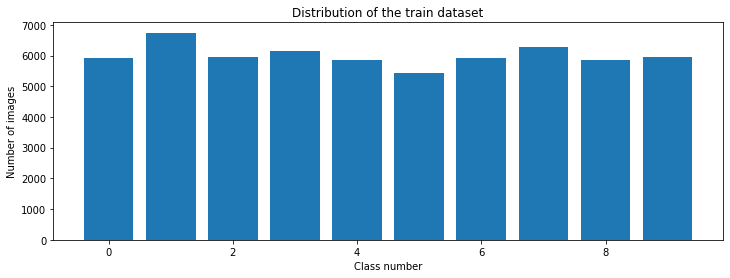

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #30 here is the number of filters 5by5 is the kernel matrix size
  model.add(MaxPooling2D(pool_size=(2, 2))) #this is the pooling layer wher 2by2 is the pooling size
  
  model.add(Conv2D(15, (3, 3), activation='relu')) #adding more convolutional layers
  model.add(MaxPooling2D(pool_size=(2, 2))) #adding the other pooling layer
  
  model.add(Flatten()) #now since data has to go to the fully connected layer the data need to be flattened or in other words cannot be in the form of two dimensional array
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5)) #this basically turns off some of the nodes which is not required by the model and thus reduce overfitting , and forces each node to learn datasets independently
  model.add(Dense(num_classes, activation='softmax')) #this is the output layer
  # Compile model
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
model = leNet_model()

In [16]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 12s 17ms/step - loss: 0.2838 - accuracy: 0.9113 - val_loss: 0.0635 - val_accuracy: 0.9817
Epoch 2/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0390 - val_accuracy: 0.9893
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0363 - val_accuracy: 0.9905
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0380 - val_accuracy: 0.9898
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 7/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0408 - val_accuracy: 0.989

Text(0.5, 0, 'epoch')

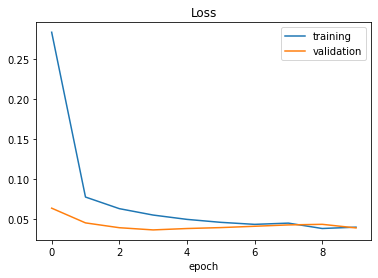

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

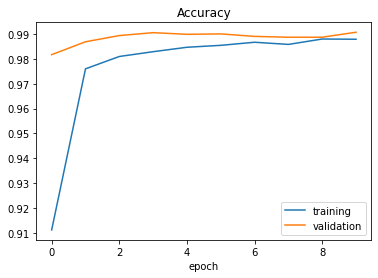

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03605721518397331
Test accuracy: 0.9904000163078308


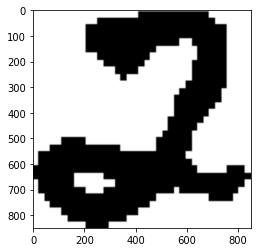

In [20]:
#predict internet number
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [21]:
import cv2

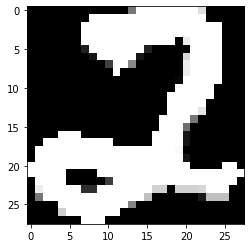

In [22]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [23]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [25]:
print(img.shape)
print("predicted digit: "+str(np.argmax(model.predict(img), axis=-1)))

(1, 28, 28, 1)
predicted digit: [2]


In [27]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


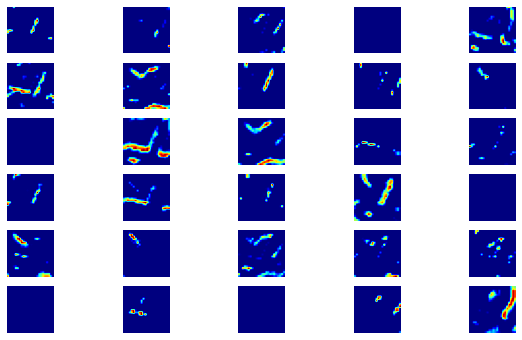

In [28]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

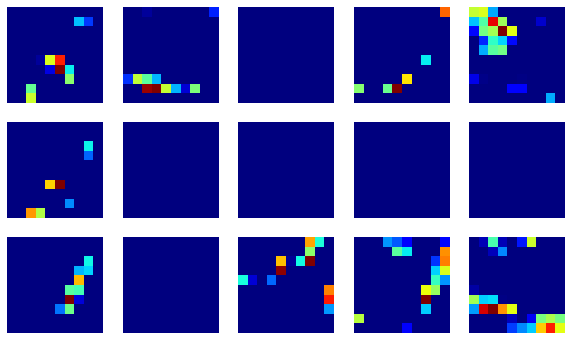

In [29]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')